In [1]:
# Import modules, setup notebook, and load data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('dark')
sns.set_context('notebook')

twitter_clean = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

# Analysis and Visualization
I'm curious to see how the different dog stages compare in terms of the number of favorites, retweets, and followers. Additionally, I want to example the fluctuations in followers over time.

## Insight 1

In [2]:
twitter_clean.groupby('stage')['favorites'].agg('describe').T

stage,doggo,floofer,pupper,puppo
count,84.000000,4.000000,244.000000,32.000000
mean,15273.202381,18295.750000,6997.467213,21381.218750
std,17703.241459,12003.089946,11215.581536,26531.432648
min,746.000000,5434.000000,264.000000,194.000000
25%,6312.000000,10547.500000,2298.250000,6978.500000
50%,10321.000000,17461.500000,3191.000000,15615.500000
75%,17151.250000,25209.750000,7164.250000,22946.500000
max,128945.000000,32826.000000,124748.000000,144037.000000


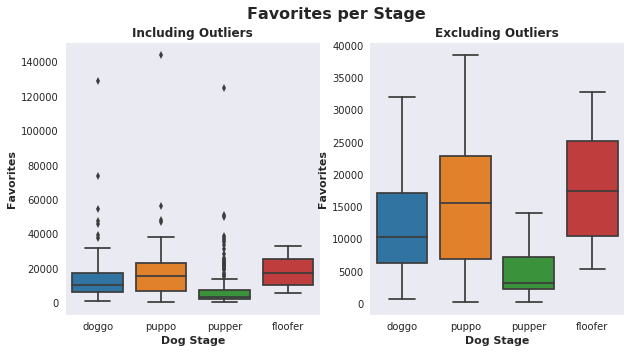

In [3]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Favorites per Stage", size=16, weight='bold')

w_outliers = plt.subplot(121)
sns.boxplot(data=twitter_clean, x='stage', y='favorites')
plt.xlabel("Dog Stage", weight='bold')
plt.ylabel("Favorites", weight='bold')
plt.title("Including Outliers", weight='bold')
sns.despine()

wo_outliers = plt.subplot(122)
sns.boxplot(data=twitter_clean, x='stage', y='favorites', showfliers=False)
plt.xlabel("Dog Stage", weight='bold')
plt.ylabel("Favorites", weight='bold')
plt.title("Excluding Outliers", weight='bold')
sns.despine()

## Analysis 1
I am surprised how few examples of Floofers are present in this dataset; notice only four Floofers exist. This leads to some skew as shown in the `describe` table above. Floofer has a very high mean, at its minimum, first, second, and third quartiles the values are higher than other dog stages. You might expect floofer is perhaps the most popular dog stage; however, the other three stages all have significantly higher maximums. This leads me to suggest the sample size of Floofers are too small to produce meaningful insights that would be applicable to new Floofer data. This analysis is confirmed by the boxplot visualizations.  

The other stages have enough samples to derive insights. It appears Puppo is the most popular dog stage because it has the highest value of any individual date as well as the highest mean and median. These suggest the distribution of Puppo values is higher than those of Doggo and Pupper.

## Insight 2

In [4]:
twitter_clean['favorites/retweets'] = twitter_clean['favorites'] / twitter_clean['retweets']
time_indexed_twitter = twitter_clean.set_index(pd.DatetimeIndex(twitter_clean['timestamp']))
month_grouped = time_indexed_twitter.groupby(pd.Grouper(freq='M'))['retweets', 'favorites'].agg(['mean'])

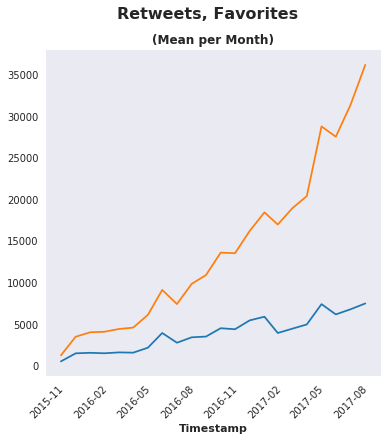

In [5]:
# Monthly grouping
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plt.plot(month_grouped)
plt.suptitle('Retweets, Favorites', size=16, weight='bold')
plt.title('(Mean per Month)', weight='bold')
locs, labels = plt.xticks()
plt.xlabel('Timestamp', weight='bold')
plt.xticks(rotation=45)
plt.show()

In [6]:
twitter_clean.groupby('stage')['favorites/retweets'].agg('describe').T

stage,doggo,floofer,pupper,puppo
count,84.000000,4.000000,244.000000,32.000000
mean,4.002320,3.592255,3.250799,6.363637
std,2.440966,1.845826,1.153334,10.873337
min,1.439550,1.820329,1.099476,2.089747
25%,2.889084,2.431561,2.517509,3.243837
50%,3.621602,3.243462,3.068882,3.676548
75%,4.533669,4.404155,3.705095,4.946387
max,21.314286,6.061765,10.153846,64.666667


## Analysis 2
I was curious to see if there were correlations between the number of favorites and retweets, particularly as it relates to dog stages. A larger number of favorites than retweets suggests users found the tweet funny, but not humorous enough to warrant retweeting and sharing with their own network. The table above suggests both puppo and doggo had some of the most favorited tweets; however, users did not retweet those tweets and the same proportion for some reason. While Pupper was arguably the least popular dog stage, their favorites to retweets ratio was mostly unaffected by tweet quality.

## Insight 3

In [7]:
only_dogs = twitter_clean.loc[twitter_clean['dog?'] == True]

In [8]:
top_15_dogs_ratings = only_dogs.groupby('prediction')['rating_numerator']\
                       .agg(['count', 'median'])\
                       .sort_values(by=['count', 'median'], ascending=False)[:15]

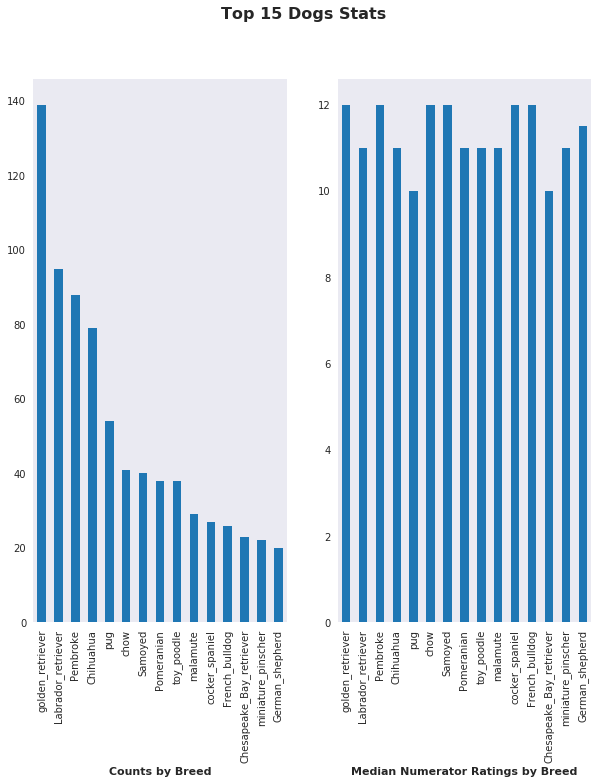

In [9]:
fig = plt.figure(figsize=(10,10))
plt.suptitle('Top 15 Dogs Stats', size=16, weight='bold')

top_15_counts = plt.subplot(121)
top_15_counts = top_15_dogs_ratings['count'].plot(kind='bar')
plt.xlabel('Counts by Breed', weight='bold')

top_15_median = plt.subplot(122)
top_15_median = top_15_dogs_ratings['median'].plot(kind='bar')
plt.xlabel('Median Numerator Ratings by Breed', weight='bold')
plt.show()

In [10]:
top_15_dogs_favorites = only_dogs.groupby('prediction')['favorites']\
                                 .agg(['count', 'median'])\
                                 .sort_values(by=['count', 'median'], ascending=False)[:15]

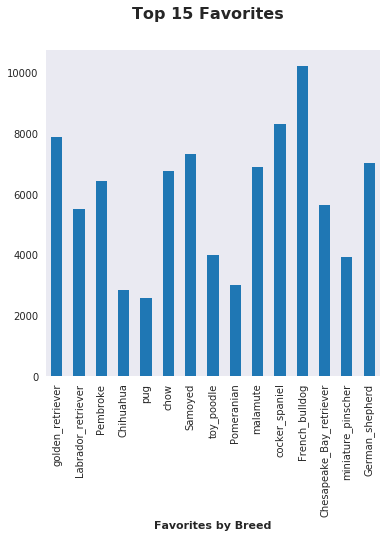

In [11]:
fig = plt.figure(figsize=(6,6))
top_15_favorites = plt.subplot(111)
top_15_favorites = top_15_dogs_favorites['median'].plot(kind='bar')
plt.suptitle('Top 15 Favorites', size=16, weight='bold')
plt.xlabel('Favorites by Breed', weight='bold')
plt.show()

## Analysis 3

While the golden retriever was the most commonly rated dog breed, it appears the French bulldog was actually the most highly favorited among the top 15 dog breeds. The median rating numerator for those top 15 breeds, however, was in the 10 to 12 range. With no real criteria to qualify those ratings, popularity and number of favorites can act as a more accurate representation of favorite dog breeds. 

## Conclusion

There are certainly more insights and visualization that can be derived from this data. These 3 insights are simply the one I explored and developed first. Other considerations related to timestamps and the presence of cyclical ratings, favorites, retweets, and followers are some possibilities for future exploration.